Importing the Dependencies

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Analysis

In [46]:
# Load the data from the CSV file
df = pd.read_csv("/content/tridosha.csv")


In [47]:
# Split the data into features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

Training the Model

In [48]:
# Use OneHotEncoder to convert categorical data to numerical data
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [50]:
# Train an MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
# Fit the model on the entire training set
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

Model Evaluation - Accuracy Score

In [51]:
# Predict the labels for the training and testing sets
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


In [52]:
# Calculate the accuracy of the classifier on the training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [53]:

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


In [54]:
# Calculate the validation accuracy using cross-validation
scores = cross_val_score(clf, X_encoded, y, cv=5)
print("Validation Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean() * 100, scores.std() * 100))



Validation Accuracy: 100.00% (+/- 0.00%)


In [33]:
from sklearn.metrics import classification_report
# Calculate the precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

       Kapha       1.00      1.00      1.00         8
       Pitta       1.00      1.00      1.00        13
        Vata       1.00      1.00      1.00        21

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



Confusion Matrix:


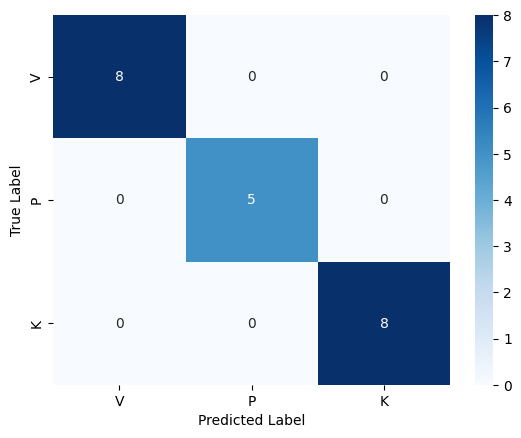

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix for testing set
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
#print(cm)

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["V", "P", "K"], yticklabels=["V", "P", "K"])

# Set the labels for the x and y axes
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()

Saving the trained Model

In [56]:
import pickle

In [57]:

filename= 'trained_model.pkl'
pickle.dump(clf, open(filename,'wb'))

In [58]:
encoder_filename = 'encoder_model.pkl'
pickle.dump(encoder, open(encoder_filename,'wb'))

In [59]:
# load trained model
loaded_model = pickle.load(open(filename,'rb'))

In [60]:
# Load the encoder model
loaded_encoder = pickle.load(open(encoder_filename, 'rb'))

Making a Predictive System

In [61]:
# Use the trained MLPClassifier to predict the class of new data
new_data = {'Body Frame':['Medium'],
       'Weight':['Low, Difficult to Put on Weight'],
       'Skin Color and Complexion':['Pink to Red'],
       'Skin Characteristics':['Dry, Rough'],
       'Sweat':['sweat even in cold weather'],
       'Head Hair':['Dry, Very Curly and with Splits End'],
       'Nails':['soft, strong, somewhat rubbery and well formed'],
       'Eyeball':['Unsteady, Fast Moving'],
       'Size and Teeth Color':['Even teeth of medium size, Yellow, Orange or Red'],
       'Eating Habit':['Eats Quickly Without Chewing Properly'],
       'Hunger':['Sudden Hunger Pangs, Sharp Hunger'],
       'Bowel Movements':['Dry, Hard, Blackish,Scanty Stools'],
       'Intolerance to Weather Conditions':['Aversion to Heat'],
       'Mood':['Changes quickly have frequent mood swings'],
       'Body Energy':['Excellent Energy Throughout day not easily Fatigued'],
       'Pulse':['Thin, Shallow and Fast with a Broken or Variable rhythm'],
       'Sleep':['Sleep heavily, Lazy'],
       'Dreams':['Dream a lot, often violent and forget their dreams easily'],
       'Communication Skills':['Speak slowly and cautiously, without volunteering much.'],
       'Quality of Voice':['Rough with broken words'],
       'Social Relations':['Love to Socialize, Relationships are Longer Lasting'],
       'Mental Activity':['Quick, Restless'],
       'Memory':['Long Term, Best'],
       'Grasping Power':['Grasps quickly but not completely and forgets quickly'],
       'Joints':['Heavy Weight Bearing'],
       'Walking Pace':['Quick, Fast with Long Steps'],
       'Nature':['Forgiving, Greatful, Not Greedy'],
       'Wealth':['Spends without thinking much'],
       'Pace of Performing Work':['Slow, Steady'],
       'Body Temperature':['Less than Normal, Hand and Feets are cold']}

In [62]:
new_df = pd.DataFrame(new_data)

In [63]:
# Use OneHotEncoder to convert the new data to numerical data
new_encoded = loaded_encoder.transform(new_df)

In [64]:
# Predict the class of the new data
y_pred_new = loaded_model.predict(new_encoded)


print("Predicted class for new data: {}".format(y_pred_new[0]))


Predicted class for new data: Vata


In [65]:
# Define diet recommendations based on the predicted body state
if y_pred_new[0] == "Vata":
  print("Your a Vata type person")
  diet_recommendations = "Favor warm, cooked foods and avoid cold, raw foods. Eat plenty of healthy fats and oils, and favor sweet, sour, and salty tastes. Avoid bitter, astringent, and pungent tastes. Drink warm beverages and avoid iced drinks. Good food choices include warm soups, stews, and casseroles; cooked grains such as rice, quinoa, and oats; cooked vegetables such as sweet potatoes, carrots, and beets; and ripe fruits such as bananas, mangoes, and avocados."

elif y_pred_new[0] == "Pitta":
  print("Your a Pitta type person")
  diet_recommendations = "Favor cool, refreshing foods and avoid hot, spicy foods. Eat plenty of fruits and vegetables, and favor sweet, bitter, and astringent tastes. Avoid sour, salty, and pungent tastes. Drink cool or lukewarm beverages and avoid very hot or iced drinks. Good food choices include fresh salads, raw vegetables, and fresh fruits such as melons, grapes, and pears; cooked grains such as barley, basmati rice, and quinoa; and cooling herbs and spices such as mint, coriander, and fennel."

elif y_pred_new[0] == "Kapha":
  print("Your a Kapha type person")
  diet_recommendations = "Favor warm, light foods and avoid heavy, oily foods. Eat plenty of vegetables and favor pungent, bitter, and astringent tastes. Avoid sweet, sour, and salty tastes. Drink warm or hot beverages and avoid cold or iced drinks. Good food choices include light soups, steamed vegetables, and cooked grains such as barley, quinoa, and millet; spicy and warming herbs and spices such as ginger, black pepper, and turmeric; and light fruits such as apples, pomegranates, and cranberries."

print("Diet recommendations based on predicted body state: ", diet_recommendations)


Your a Vata type person
Diet recommendations based on predicted body state:  Favor warm, cooked foods and avoid cold, raw foods. Eat plenty of healthy fats and oils, and favor sweet, sour, and salty tastes. Avoid bitter, astringent, and pungent tastes. Drink warm beverages and avoid iced drinks. Good food choices include warm soups, stews, and casseroles; cooked grains such as rice, quinoa, and oats; cooked vegetables such as sweet potatoes, carrots, and beets; and ripe fruits such as bananas, mangoes, and avocados.
